In [1]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/dataset.zip" -d "/content/drive/MyDrive"

Archive:  /content/drive/MyDrive/dataset.zip
replace /content/drive/MyDrive/dataset/Crypto_1min/data_ARKUSDT.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Loading Embeded news based on Finbert

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_news = pd.read_pickle('/content/drive/MyDrive/dataset/News/news_20crypto_embed_finbert.pickle')

Embedding No News sentence for using in timestamp with no news

In [3]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load FinBERT model and tokenizer
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Your input news text
text = "No news."

# Tokenize and encode the text
inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

# Get the model output
with torch.no_grad():
    outputs = model(**inputs)

# Use the [CLS] token embedding as sentence embedding
cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: [1, 768]

# Convert to numpy array if needed
embedding_vector = cls_embedding.squeeze().numpy()

print("Embedding shape:", embedding_vector.shape)
# print("Embedding vector:", embedding_vector)
no_news_vector = list(embedding_vector)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Embedding shape: (768,)


Loading OHLCV of multi stocks

In [4]:
import os

list_crypto = [x[5:-4] for x in os.listdir('/content/drive/MyDrive/dataset/Crypto_1min') if 'data_' in x and 'FORMUSDT' not in x]
# list_crypto = list_crypto[4:10]

In [91]:
list_data = []
selected_f_asset = ['open', 'high', 'low', 'close', 'volume',
    'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol',
       'takerBuyQuoteVol']
selected_f_asset = ['close', 'volume', 'numberOfTrades', 'return']
selected_f_all = []
list_target_volatility = []
list_target_return = []

for symb in list_crypto:
  df = pd.read_pickle('/content/drive/MyDrive/dataset/Crypto_1min/data_{}.pkl'.format(symb))
  print(symb, len(df))
  df['return'] = 100*df['close'].pct_change()
  df = df[selected_f_asset].rename(columns={x:symb+'_'+x for x in selected_f_asset})
  selected_f_all.extend(list(df.columns))
  df[symb+'_target_volatility'] = df[symb+'_'+'return'].rolling(30).std().shift(-30)
  df[symb + '_target_return'] = 100 * (df[symb+'_'+'close'].shift(-30) / df[symb+'_'+'close'] - 1)
  list_target_volatility.append(symb+'_target_volatility')
  list_target_return.append(symb+'_target_return')
  list_data.append(df.copy())

TUSDT 131041
WUSDT 131041
BTCUSDT 131041
USDCUSDT 131041
XRPUSDT 131041
OGUSDT 131041
TRXUSDT 131041
TSTUSDT 131041
JSTUSDT 131041
DUSDT 131041
SUSDT 131041
GMTUSDT 131041
HBARUSDT 131041
TIAUSDT 131041
XLMUSDT 131041
HOTUSDT 131041
MEUSDT 131041
ARKUSDT 131041
SEIUSDT 131041
ETHUSDT 131041


In [92]:
len(selected_f_all)

80

In [93]:
data = pd.concat(list_data,axis=1)
df = pd.read_pickle('/content/drive/MyDrive/dataset/Crypto_1min/data_{}.pkl'.format('BTCUSDT'))
df['return'] = df['close'].pct_change()
data['dateTime'] = df['dateTime']
data['time'] = data['dateTime'].astype(str).copy()
data['return'] = df['close'].pct_change()
data

,TUSDT_close,TUSDT_volume,TUSDT_numberOfTrades,TUSDT_return,TUSDT_target_volatility,TUSDT_target_return,WUSDT_close,WUSDT_volume,WUSDT_numberOfTrades,WUSDT_return,...,SEIUSDT_target_return,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target_volatility,ETHUSDT_target_return,dateTime,time,return
0,0.01941,488396.20000000,61,NaN,0.316787,-0.566718,0.1363,134184.40000000,48,NaN,...,-0.260223,2522.98,1236.00450000,7010,NaN,0.318551,-0.212051,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN
1,0.01944,285132.80000000,43,0.154560,0.316003,-0.874486,0.1365,61450.40000000,33,0.146735,...,-1.150705,2525.15,609.72690000,4877,0.086009,0.332003,-0.827278,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573
2,0.01943,47202.20000000,3,-0.051440,0.320181,-1.132270,0.1367,30558.20000000,23,0.146520,...,-0.373692,2529.97,672.80150000,3844,0.190880,0.329443,-1.042305,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342
3,0.01938,198852.60000000,14,-0.257334,0.321638,-1.186791,0.1365,180247.10000000,95,-0.146306,...,-0.037580,2525.85,595.41120000,3903,-0.162848,0.330147,-1.086763,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068
4,0.01931,219158.90000000,16,-0.361197,0.316766,-0.725013,0.1356,98858.20000000,89,-0.659341,...,0.680529,2516.18,1280.56490000,9605,-0.382841,0.324541,-0.594552,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131036,0.01725,578.70000000,1,0.000000,NaN,NaN,0.1013,37372.00000000,56,0.098814,...,NaN,2562.98,50.44800000,421,0.000000,NaN,NaN,2025-05-26 23:56:00,2025-05-26 23:56:00,-0.000065
131037,0.01725,578.70000000,1,0.000000,NaN,NaN,0.1016,136421.50000000,119,0.296150,...,NaN,2563.49,77.09600000,508,0.019899,NaN,NaN,2025-05-26 23:57:00,2025-05-26 23:57:00,0.000137
131038,0.01725,578.70000000,1,0.000000,NaN,NaN,0.1016,12664.90000000,20,0.000000,...,NaN,2563.20,60.38830000,171,-0.011313,NaN,NaN,2025-05-26 23:58:00,2025-05-26 23:58:00,0.000077
131039,0.01724,27619.40000000,8,-0.057971,NaN,NaN,0.1016,75435.00000000,22,0.000000,...,NaN,2563.70,99.02600000,711,0.019507,NaN,NaN,2025-05-26 23:59:00,2025-05-26 23:59:00,0.000157


Preparing embedding of news (Handling multi news and no news)

In [94]:
import numpy as np
df_news['embedding'] = df_news['embedding'].apply(lambda x: np.array(x))

df_grouped = df_news[['time', 'embedding', 'count']].groupby('time')['embedding'].apply(
    lambda x: np.mean(np.stack(x.values), axis=0)
).reset_index()
data_all = data.merge(df_grouped, on='time', how='left')
data_all['embedding'] = data_all['embedding'].apply(
    lambda x: no_news_vector if x is np.nan or x is None else x
)

In [95]:
list_crypto_first = [x[:-4] for x in list_crypto]
list_crypto_first

['T',
 'W',
 'BTC',
 'USDC',
 'XRP',
 'OG',
 'TRX',
 'TST',
 'JST',
 'D',
 'S',
 'GMT',
 'HBAR',
 'TIA',
 'XLM',
 'HOT',
 'ME',
 'ARK',
 'SEI',
 'ETH']

In [96]:
data_all = data_all[data_all['time']>=df_news['time'].min()][data_all['time']<=df_news['time'].max()]

Showing Data

In [97]:
data_all

,TUSDT_close,TUSDT_volume,TUSDT_numberOfTrades,TUSDT_return,TUSDT_target_volatility,TUSDT_target_return,WUSDT_close,WUSDT_volume,WUSDT_numberOfTrades,WUSDT_return,...,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,ETHUSDT_return,ETHUSDT_target_volatility,ETHUSDT_target_return,dateTime,time,return,embedding
0,0.01941,488396.20000000,61,NaN,0.316787,-0.566718,0.1363,134184.40000000,48,NaN,...,2522.98,1236.00450000,7010,NaN,0.318551,-0.212051,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN,"[-0.34357853420078754, -0.14405876398086548, -..."
1,0.01944,285132.80000000,43,0.154560,0.316003,-0.874486,0.1365,61450.40000000,33,0.146735,...,2525.15,609.72690000,4877,0.086009,0.332003,-0.827278,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573,"[-0.5324994325637817, -0.6590844392776489, -0...."
2,0.01943,47202.20000000,3,-0.051440,0.320181,-1.132270,0.1367,30558.20000000,23,0.146520,...,2529.97,672.80150000,3844,0.190880,0.329443,-1.042305,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."
3,0.01938,198852.60000000,14,-0.257334,0.321638,-1.186791,0.1365,180247.10000000,95,-0.146306,...,2525.85,595.41120000,3903,-0.162848,0.330147,-1.086763,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."
4,0.01931,219158.90000000,16,-0.361197,0.316766,-0.725013,0.1356,98858.20000000,89,-0.659341,...,2516.18,1280.56490000,9605,-0.382841,0.324541,-0.594552,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129596,0.01735,15434.10000000,8,0.115407,0.067054,-0.634006,0.0990,128945.70000000,57,0.000000,...,2552.77,225.37620000,1890,0.102739,0.076258,-0.240131,2025-05-25 23:56:00,2025-05-25 23:56:00,0.001304,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."
129597,0.01734,5154.20000000,4,-0.057637,0.068968,-0.692042,0.0989,13436.80000000,8,-0.101010,...,2551.81,1078.91390000,2178,-0.037606,0.081963,-0.376595,2025-05-25 23:57:00,2025-05-25 23:57:00,-0.000052,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."
129598,0.01733,2395.00000000,3,-0.057670,0.070195,-0.577034,0.0988,273.00000000,1,-0.101112,...,2550.74,90.29550000,1032,-0.041931,0.083562,-0.252476,2025-05-25 23:58:00,2025-05-25 23:58:00,-0.000261,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."
129599,0.01733,33818.80000000,7,0.000000,0.071531,-0.519331,0.0989,21541.50000000,6,0.101215,...,2551.22,90.74810000,584,0.018818,0.083668,-0.244197,2025-05-25 23:59:00,2025-05-25 23:59:00,0.000076,"[0.72549707, -0.31765997, -1.8444276, 0.742729..."


In [98]:
df_init = data_all.copy()

Normalizing Data Z-Score

In [12]:
##Normalization

for x in selected_f_all:
  data_all[x] = data_all[x].fillna(0)
  data_all[x] = data_all[x].astype(float)
  data_all[x] = (data_all[x]-data_all[x].mean())/(data_all[x].std())

Create time index for TimseNet

In [13]:
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import Dataset, DataLoader

df_stamp = data_all[['time']].rename(columns={'time':'dateTime'})
df_stamp['dateTime'] = pd.to_datetime(df_stamp['dateTime'])
df_stamp['month'] = df_stamp.dateTime.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.dateTime.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.dateTime.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.dateTime.apply(lambda row: row.minute, 1)
data_stamp = df_stamp.drop(['dateTime'], axis=1)

Dataset Class and Creating DataLoader

In [14]:
import torch
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import Dataset, DataLoader

class NewsTimeSeriesDataset(Dataset):
    def __init__(self,
                 df,
                 data_stamp,
                 selected_f_all,
                 stock_list,      # e.g. ['BTC', 'ETH', …]
                 seq_len=30,
                 target_type='return'):
        self.df = df.reset_index(drop=True)
        self.data_stamp = data_stamp.reset_index(drop=True)
        self.features = selected_f_all
        self.seq_len = seq_len

        # Build the list of target column names once
        suffix = '_target_volatility' if target_type == 'volatility' else '_target_return'
        self.target_cols = [f"{coin}{suffix}" for coin in stock_list]

    def __len__(self):
        return len(self.df) - self.seq_len

    def __getitem__(self, idx):
        # Time‐series slice
        ts_window = self.df.loc[idx:idx + self.seq_len - 1,
                                self.features] \
                          .values.astype('float32')

        # News embeddings slice
        news_list = self.df.loc[idx:idx + self.seq_len - 1, 'embedding'].values
        news_window = np.stack(news_list).astype('float32')

        # Time mask slice
        x_mask = self.data_stamp.loc[idx:idx + self.seq_len - 1] \
                                   .values.astype('float32')

        # The volatility (or return) target at the step after the window
        target = self.df.loc[idx + self.seq_len, self.target_cols] \
                          .values.astype('float32')

        return {
            'timeseries': torch.tensor(ts_window),   # [seq_len, num_features]
            'news':       torch.tensor(news_window), # [seq_len, news_dim]
            'time_mask':  torch.tensor(x_mask),      # [seq_len, ...]
            'target':     torch.tensor(target),      # [num_stocks]
        }

Model Architecture

In [15]:
import math
import torch.nn as nn
import torch

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)  # [max_len, d_model]
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # [d_model/2]

        pe[:, 0::2] = torch.sin(position * div_term)  # even dims
        pe[:, 1::2] = torch.cos(position * div_term)  # odd dims
        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x

class TransformerReturnPredictor(nn.Module):
    def __init__(self, feature_dim, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, feature_dim]
        x = self.input_proj(x)             # [batch_size, seq_len, d_model]
        x = self.pos_encoder(x)            # Add positional encoding
        x = self.transformer(x)            # [batch_size, seq_len, d_model]
        x = x[:, -1, :]                    # Use representation of last time step
        return self.output_layer(x).squeeze(-1)


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
from transformers import AutoTokenizer, AutoModel
finbert_model_name = "yiyanghkust/finbert-tone"
import torch.nn as nn

class MarketNewsFusionModel(nn.Module):
    def __init__(self, ts_input_dim, news_embed_dim, hidden_dim=64, num_stocks=19,
                 max_len=30, d_model=64, nhead=4, num_layers=2, target_type="return"):
        super().__init__()
        self.num_stocks = num_stocks

        self.d_model = d_model
        self.input_proj = nn.Linear(ts_input_dim, self.d_model)
        self.pos_encoder = PositionalEncoding(self.d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ts_out = nn.Linear(128, hidden_dim)
        self.target_type = target_type

        # 2. News LSTM
        self.news_proj = nn.Linear(news_embed_dim, 64)
        self.news_lstm = nn.LSTM(input_size=64, hidden_size=hidden_dim, batch_first=True)

        # 3. Stock-specific regression heads (1 per stock)
        self.stock_heads = nn.Sequential(
            nn.Linear(self.d_model+hidden_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_stocks)
        )


    def forward(self, ts_input, x_mark_enc, news_input):  # [B, 30, F], [B, 30, E]

                # Transformer on OHLCV
        x = self.input_proj(ts_input)           # [B, T, d_model]
        x = self.pos_encoder(x)
        x = self.transformer(x)                  # [B, T, d_model]
        ts_emb = x[:, -1, :].squeeze(1)                   # [B, d_model]


        news_proj = self.news_proj(news_input)         # [B, 30, 64]
        _, (hn, _) = self.news_lstm(news_proj)        # hn: [1, B, 64]
        news_emb = hn[-1]                              # [B, 64]

        fused = torch.cat([ts_emb, news_emb], dim=1)   # [B, 128]

        outputs = self.stock_heads(fused).squeeze(-1)
        if self.target_type == "volatility":
            return torch.exp(outputs)             # [B, 19]
        return outputs             # [B, 19]


seq_len = 30

# model = TimesNet.Model(args).float()
# model = Model_TimesNet(configs).float()

In [17]:
data_all = data_all.fillna(0)

Loading Model and dataloader

In [18]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [19]:
data_all['ETHUSDT_close']

,ETHUSDT_close
0,1.599140
1,1.605819
2,1.620656
3,1.607974
4,1.578209
...,...
129596,1.690837
129597,1.687882
129598,1.684588
129599,1.686066


In [20]:
data_stamp

,month,day,weekday,hour,minute
0,2,25,1,0,0
1,2,25,1,0,1
2,2,25,1,0,2
3,2,25,1,0,3
4,2,25,1,0,4
...,...,...,...,...,...
129596,5,25,6,23,56
129597,5,25,6,23,57
129598,5,25,6,23,58
129599,5,25,6,23,59


In [21]:
data_all.columns

Index(['TUSDT_close', 'TUSDT_volume', 'TUSDT_numberOfTrades', 'TUSDT_return',
       'TUSDT_target_volatility', 'TUSDT_target_return', 'WUSDT_close',
       'WUSDT_volume', 'WUSDT_numberOfTrades', 'WUSDT_return',
       ...
       'ETHUSDT_close', 'ETHUSDT_volume', 'ETHUSDT_numberOfTrades',
       'ETHUSDT_return', 'ETHUSDT_target_volatility', 'ETHUSDT_target_return',
       'dateTime', 'time', 'return', 'embedding'],
      dtype='object', length=124)

In [41]:
feature_cols

['BTCUSDT_close',
 'BTCUSDT_volume',
 'BTCUSDT_numberOfTrades',
 'XRPUSDT_close',
 'XRPUSDT_volume',
 'XRPUSDT_numberOfTrades',
 'TRXUSDT_close',
 'TRXUSDT_volume',
 'TRXUSDT_numberOfTrades',
 'JSTUSDT_close',
 'JSTUSDT_volume',
 'JSTUSDT_numberOfTrades',
 'HBARUSDT_close',
 'HBARUSDT_volume',
 'HBARUSDT_numberOfTrades',
 'TIAUSDT_close',
 'TIAUSDT_volume',
 'TIAUSDT_numberOfTrades',
 'XLMUSDT_close',
 'XLMUSDT_volume',
 'XLMUSDT_numberOfTrades',
 'ARKUSDT_close',
 'ARKUSDT_volume',
 'ARKUSDT_numberOfTrades',
 'SEIUSDT_close',
 'SEIUSDT_volume',
 'SEIUSDT_numberOfTrades',
 'ETHUSDT_close',
 'ETHUSDT_volume',
 'ETHUSDT_numberOfTrades']

In [22]:
symbols_to_use = [
    "BTCUSDT", "ETHUSDT", "XRPUSDT", "TRXUSDT", "HBARUSDT",
    "XLMUSDT", "TIAUSDT", "ARKUSDT", "SEIUSDT", "JSTUSDT"
]

feature_cols = [
    col
    for col in data_all.columns
    if any(col.startswith(sym + "_") for sym in symbols_to_use)
       and "target" not in col
       and not col.endswith("_return")
]

target_cols_return     = [f"{sym}_target_return" for sym in symbols_to_use]
target_cols_volatility = [f"{sym}_target_volatility" for sym in symbols_to_use]
all_target_cols        = list(set(target_cols_return + target_cols_volatility))

# Include targets in data_filt (still not passed to model)
data_filt = data_all[["dateTime", "embedding"] + feature_cols + all_target_cols].copy()
stamp_filt = data_stamp.loc[data_filt.index].copy()

data_filt["day"] = data_filt["dateTime"].dt.strftime("%Y-%m-%d")
train_mask       = data_filt["day"] < "2025-05-10"
val_mask         = data_filt["day"] >= "2025-05-10"

train_dataset_volatility = NewsTimeSeriesDataset(
    data_filt.loc[train_mask],      # DataFrame with dateTime, embedding, and exactly feature_cols
    stamp_filt.loc[train_mask],     # your timestamp features
    feature_cols,                   # <<— use the 10-symbol list here
    symbols_to_use,
    seq_len=30,
    target_type="volatility"
)
val_dataset_volatility = NewsTimeSeriesDataset(
    data_filt.loc[val_mask],
    stamp_filt.loc[val_mask],
    feature_cols,                   # <<— and here
    symbols_to_use,
    seq_len=30,
    target_type="volatility"
)

train_dataset_return = NewsTimeSeriesDataset(
    data_filt.loc[train_mask],
    stamp_filt.loc[train_mask],
    feature_cols,                   # <<— and here
    symbols_to_use,
    seq_len=30,
    target_type="return"
)
val_dataset_return = NewsTimeSeriesDataset(
    data_filt.loc[val_mask],
    stamp_filt.loc[val_mask],
    feature_cols,                   # <<— and here
    symbols_to_use,
    seq_len=30,
    target_type="return"
)

train_loader_volatility = DataLoader(train_dataset_volatility, batch_size=32, shuffle=True)
val_loader_volatility   = DataLoader(val_dataset_volatility,   batch_size=32)

train_loader_return     = DataLoader(train_dataset_return,     batch_size=32, shuffle=True)
val_loader_return       = DataLoader(val_dataset_return,       batch_size=32)

model_volatility = MarketNewsFusionModel(
    len(feature_cols),                         # ts_input_dim
    len(data_filt["embedding"].iloc[0]),       # news_embed_dim
    64,                                        # hidden_dim
    len(symbols_to_use),                       # num_stocks
    30,                                        # max_len
    64, 4, 2,                                   # d_model, nhead, num_layers
    target_type="volatility"
).to(device)
optimizer_volatility = torch.optim.Adam(model_volatility.parameters(), lr=1e-4)

model_return = MarketNewsFusionModel(
    len(feature_cols),
    len(data_filt["embedding"].iloc[0]),
    64,
    len(symbols_to_use),
    30,
    64, 4, 2,
    target_type="return"
).to(device)
optimizer_return = torch.optim.Adam(model_return.parameters(), lr=1e-4)

loss_fn = nn.MSELoss()

Testing model pipeline

In [23]:
# One training step
for batch in train_loader_volatility:
    ts_input = batch['timeseries'].to(device)
    news_input = batch['news'].to(device)
    target = batch['target'].to(device)
    time_mask = batch['time_mask'].to(device)

    output = model_volatility(ts_input, time_mask, news_input)  # [B, 19]
    loss = loss_fn(output, target)
    break

In [24]:
# One training step
for batch in train_loader_return:
    ts_input = batch['timeseries'].to(device)
    news_input = batch['news'].to(device)
    target = batch['target'].to(device)
    time_mask = batch['time_mask'].to(device)

    output = model_return(ts_input, time_mask, news_input)  # [B, 19]
    loss = loss_fn(output, target)
    break

Training model

In [25]:
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import torch
import numpy as np
import os

def compute_r2_per_stock(y_true, y_pred):
    r2s = []
    for i in range(y_true.shape[1]):
        r2s.append(r2_score(y_true[:, i], y_pred[:, i]))
    return r2s

num_epochs=50
patience=5
save_path='best_model_volatility.pth'

best_val_loss = float('inf')
patience_counter = 0
model_volatility.to(device)

for epoch in range(1, num_epochs + 1):
    model_volatility.train()
    total_train_loss = 0

    print(f"\n🔁 Epoch {epoch}/{num_epochs}")
    for step, batch in enumerate(tqdm(train_loader_volatility, desc="Training")):
        ts_input = batch['timeseries'].to(device)
        news_input = batch['news'].to(device)
        target = batch['target'].to(device)
        time_mask = batch['time_mask'].to(device)

        output = model_volatility(ts_input, time_mask, news_input)
        loss = loss_fn(output, target)

        optimizer_volatility.zero_grad()
        loss.backward()
        optimizer_volatility.step()
        total_train_loss += loss.item()

        # Step-wise print every 100 steps
        if step % 100 == 0:
            avg_loss = total_train_loss / (step + 1)
            print(f"  Step {step}/{len(train_loader_volatility)} - Batch Loss: {loss.item():.4f} - Avg Loss: {avg_loss:.4f}")

    # Validation phase
    model_volatility.eval()
    total_val_loss = 0
    all_preds, all_targets = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader_volatility, desc="Validating"):
            ts_input = batch['timeseries'].to(device)
            news_input = batch['news'].to(device)

            target = batch['target'].to(device)
            time_mask = batch['time_mask'].to(device)

            output = model_volatility(ts_input, time_mask, news_input)
            loss = loss_fn(output, target)

            total_val_loss += loss.item()
            all_preds.append(output.cpu().numpy())
            all_targets.append(target.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader_volatility)
    avg_val_loss = total_val_loss / len(val_loader_volatility)

    y_pred = np.concatenate(all_preds, axis=0)
    y_true = np.concatenate(all_targets, axis=0)
    r2_scores = compute_r2_per_stock(y_true, y_pred)

    print(f"📊 Epoch {epoch} Summary:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print("  R² per stock:", ["{} , {:.3f}".format(list_crypto_first[r], r2_scores[r]) for r in range(len(r2_scores))])

    if epoch % 5 == 0:
        np.save(f"y_pred_epoch_{epoch}.npy", y_pred)
        np.save(f"y_true_epoch_{epoch}.npy", y_true)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model_volatility.state_dict(), save_path)
        print("✅ Best model_volatility saved.")
    else:
        patience_counter += 1
        print(f"⏳ Early stopping patience: {patience_counter}/{patience}")

    if patience_counter >= patience:
        print("⛔ Early stopping triggered.")
        break


🔁 Epoch 1/50


Training:   0%|          | 0/3330 [00:00<?, ?it/s]

  Step 0/3330 - Batch Loss: 0.8854 - Avg Loss: 0.8854


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import torch
import numpy as np
import os

def compute_r2_per_stock(y_true, y_pred):
    r2s = []
    for i in range(y_true.shape[1]):
        r2s.append(r2_score(y_true[:, i], y_pred[:, i]))
    return r2s

num_epochs=50
patience=5
save_path='best_model_return.pth'

best_val_loss = float('inf')
patience_counter = 0
model_return.to(device)

for epoch in range(1, num_epochs + 1):
    model_return.train()
    total_train_loss = 0

    print(f"\n🔁 Epoch {epoch}/{num_epochs}")
    for step, batch in enumerate(tqdm(train_loader_return, desc="Training")):
        ts_input = batch['timeseries'].to(device)
        news_input = batch['news'].to(device)
        target = batch['target'].to(device)
        time_mask = batch['time_mask'].to(device)

        output = model_return(ts_input, time_mask, news_input)
        loss = loss_fn(output, target)

        optimizer_return.zero_grad()
        loss.backward()
        optimizer_return.step()
        total_train_loss += loss.item()

        # Step-wise print every 100 steps
        if step % 100 == 0:
            avg_loss = total_train_loss / (step + 1)
            print(f"  Step {step}/{len(train_loader_return)} - Batch Loss: {loss.item():.4f} - Avg Loss: {avg_loss:.4f}")

    # Validation phase
    model_return.eval()
    total_val_loss = 0
    all_preds, all_targets = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader_return, desc="Validating"):
            ts_input = batch['timeseries'].to(device)
            news_input = batch['news'].to(device)
            # TODO: check here
            target = batch['target'].to(device)
            time_mask = batch['time_mask'].to(device)

            output = model_return(ts_input, time_mask, news_input)
            loss = loss_fn(output, target)

            total_val_loss += loss.item()
            all_preds.append(output.cpu().numpy())
            all_targets.append(target.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader_return)
    avg_val_loss = total_val_loss / len(val_loader_return)

    y_pred = np.concatenate(all_preds, axis=0)
    y_true = np.concatenate(all_targets, axis=0)
    r2_scores = compute_r2_per_stock(y_true, y_pred)

    print(f"📊 Epoch {epoch} Summary:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print("  R² per stock:", ["{} , {:.3f}".format(list_crypto_first[r], r2_scores[r]) for r in range(len(r2_scores))])

    if epoch % 5 == 0:
        np.save(f"y_pred_epoch_{epoch}.npy", y_pred)
        np.save(f"y_true_epoch_{epoch}.npy", y_true)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model_return.state_dict(), save_path)
        print("✅ Best model_return saved.")
    else:
        patience_counter += 1
        print(f"⏳ Early stopping patience: {patience_counter}/{patience}")

    if patience_counter >= patience:
        print("⛔ Early stopping triggered.")
        break

In [27]:
model_volatility = MarketNewsFusionModel(
    len(feature_cols),                         # ts_input_dim
    len(data_filt["embedding"].iloc[0]),       # news_embed_dim
    64,                                        # hidden_dim
    len(symbols_to_use),                       # num_stocks
    30,                                        # max_len
    64, 4, 2                                   # d_model, nhead, num_layers
).to(device)

model_return = MarketNewsFusionModel(
    len(feature_cols),
    len(data_filt["embedding"].iloc[0]),
    64,
    len(symbols_to_use),
    30,
    64, 4, 2
).to(device)

model_return.load_state_dict(torch.load("best_model_return.pth",     map_location=device))
model_volatility.load_state_dict(torch.load("best_model_volatility.pth", map_location=device))
model_return.eval()
model_volatility.eval()

MarketNewsFusionModel(
  (input_proj): Linear(in_features=30, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding()
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ts_out): Linear(in_features=128, out_features=64, bias=True)
  (news_proj): Linear(in_features=768, out_features=64, bias=True)
  (news_lstm): LSTM(64, 64, batch_fi

In [26]:
from tqdm.notebook import tqdm

In [28]:
all_mu  = []
all_vol = []

with torch.no_grad():
    for batch in tqdm(val_loader_volatility, desc="Inference on val set"):
        ts_batch   = batch['timeseries'].to(device)  # [B, 30, F]
        mask_batch = batch['time_mask'].to(device)   # [B, 30, …]
        news_batch = batch['news'].to(device)        # [B, 30, 768]

        mu_pred  = model_return(ts_batch, mask_batch, news_batch)     # [B,20]
        vol_pred = model_volatility(ts_batch, mask_batch, news_batch) # [B,20]

        all_mu .append(mu_pred .cpu().numpy())
        all_vol.append(vol_pred.cpu().numpy())

# Concatenate across batches:
all_mu  = np.concatenate(all_mu,  axis=0)   # [N_val, 20]
all_vol = np.concatenate(all_vol, axis=0)   # [N_val, 20]

print("Return preds shape:   ", all_mu .shape)
print("Volatility preds shape:", all_vol.shape)

Inference on val set:   0%|          | 0/720 [00:00<?, ?it/s]

Return preds shape:    (23011, 10)
Volatility preds shape: (23011, 10)


# Implement paper

In [29]:
import numpy as np
import cvxpy as cp
from random import sample
from tqdm.notebook import tqdm

helper functions

In [30]:
def build_cov_matrix(std, corr):
    """Cov_ij = corr_ij * std_i * std_j"""
    return np.outer(std, std) * corr

Method 0: standard MVO (no cardinality)

In [31]:
def optimize_mvo(stats, gamma=3.0):
    mu, std, corr = stats['mean'], stats['std'], stats['corr']
    cov = build_cov_matrix(std, corr)
    n = len(mu)
    x = cp.Variable(n)
    obj = cp.Maximize(mu @ x - 0.5 * gamma * cp.quad_form(x, cov))
    cons = [cp.sum(x) == 1, x >= 0]
    prob = cp.Problem(obj, cons)
    prob.solve(solver=cp.SCS)
    return x.value

Method 1: near‐optimal utility + low concentration

In [32]:
def optimize_method1(stats, gamma=3.0, theta=0.90):
    mu, std, corr = stats['mean'], stats['std'], stats['corr']
    cov = build_cov_matrix(std, corr)
    n = len(mu)

    # 1) full MVO → ε
    x0 = cp.Variable(n)
    util0 = cp.Maximize(mu @ x0 - 0.5 * gamma * cp.quad_form(x0, cov))
    cons0 = [cp.sum(x0) == 1, x0 >= 0]
    cp.Problem(util0, cons0).solve(solver=cp.SCS)
    w0 = x0.value
    eps = mu @ w0 - 0.5 * gamma * (w0.T @ cov @ w0)

    # 2) minimize ∑ x_i² subject to utility ≥ θ·ε
    x = cp.Variable(n)
    obj = cp.Minimize(cp.sum_squares(x))
    util_constr = mu @ x - 0.5 * gamma * cp.quad_form(x, cov) >= theta * eps
    cons = [cp.sum(x) == 1, x >= 0, util_constr]
    prob = cp.Problem(obj, cons)
    prob.solve(solver=cp.SCS)
    return x.value

Method 2: resampled MVO (approximate cardinality)

In [33]:
def optimize_mvo_sub(mu_sub, cov_sub, gamma):
    m = len(mu_sub)
    x = cp.Variable(m)
    obj = cp.Maximize(mu_sub @ x - 0.5 * gamma * cp.quad_form(x, cov_sub))
    cons = [cp.sum(x) == 1, x >= 0]
    prob = cp.Problem(obj, cons)
    prob.solve(solver=cp.SCS)
    return x.value

def optimize_method2(stats, gamma=3.0, num_resamples=100, subset_size=5):
    mu, std, corr = stats['mean'], stats['std'], stats['corr']
    cov = build_cov_matrix(std, corr)
    n = len(mu)
    w_acc = np.zeros(n)

    for _ in range(num_resamples):
        subset = sorted(sample(range(n), subset_size))
        mu_sub  = mu[subset]
        cov_sub = cov[np.ix_(subset, subset)]
        try:
            w_sub = optimize_mvo_sub(mu_sub, cov_sub, gamma)
        except:
            continue
        w_full = np.zeros(n)
        for i, wi in zip(subset, w_sub):
            w_full[i] = wi
        w_acc += w_full

    return w_acc / num_resamples

Apply over your validation forecasts

In [101]:
df_portfolio = {}
df_portfolio['dataTime'] = df_init.loc[val_mask]['dateTime']
df_portfolio = pd.DataFrame(df_portfolio)
for symb in symbols_to_use:
    df_portfolio[symb+'_return'] = df_init.loc[val_mask][symb+'_return']
df_portfolio.fillna(0, inplace=True)
df_portfolio['dataTime'] = pd.to_datetime(df_portfolio['dataTime'])
df_portfolio.set_index('dataTime', inplace=True)

In [140]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

alpha = 1

half_hour_mask = df_portfolio.index.minute.isin([0, 30])
idxs = np.where(half_hour_mask)[0]

w_mvo = np.zeros((len(idxs), all_mu.shape[1]))
w_m2  = np.zeros((len(idxs), all_mu.shape[1]))

return_columns = [f'{s}_return' for s in symbols_to_use]

for k, t in tqdm(enumerate(idxs)):
    if t < 30:
        continue

    end_time = df_portfolio.index[t]
    start_time = end_time - pd.Timedelta(minutes=29)

    past_returns_window = df_portfolio.loc[start_time:end_time, return_columns]

    past_returns_window.columns = symbols_to_use
    past_corr = past_returns_window.corr().to_numpy()

    past_corr = np.nan_to_num(past_corr, nan=0.0)
    past_corr = (past_corr + past_corr.T) / 2

    past_mu  = past_returns_window.mean().to_numpy()
    past_vol = past_returns_window.std().to_numpy()
    past_vol[past_vol < 1e-8] = 1e-8

    weighted_mu  = (1 - alpha) * past_mu  + alpha * all_mu[k]
    weighted_vol = (1 - alpha) * past_vol + alpha * all_vol[k]

    stats = {
        "mean": weighted_mu,
        "std":  weighted_vol,
        "corr": past_corr
    }

    w_mvo[k] = optimize_mvo(stats, gamma=3.0)
    w_m2[k]  = optimize_method2(
        stats,
        gamma=3.0,
        num_resamples=20,
        subset_size=5
    )

0it [00:00, ?it/s]

In [141]:
dates_weights = pd.date_range('2025-05-10 00:00', '2025-05-26 00:00', freq='30min')

df_weights_mvo = pd.DataFrame(w_mvo, index=dates_weights, columns=symbols_to_use)
df_weights_mvo.columns = [f'{col}_return' for col in df_weights_mvo.columns]
df_aligned_weights_mvo = df_weights_mvo.reindex(df_portfolio.index).ffill()
portfolio_return_mvo = (df_portfolio * df_aligned_weights_mvo).sum(axis=1)
df_portfolio['portfolio_return_mvo'] = portfolio_return_mvo
df_portfolio['cumulative_sum_mvo'] = df_portfolio['portfolio_return_mvo'].cumsum()

df_weights_m2 = pd.DataFrame(w_m2, index=dates_weights, columns=symbols_to_use)
df_weights_m2.columns = [f'{col}_return' for col in df_weights_m2.columns]
df_aligned_weights_m2 = df_weights_m2.reindex(df_portfolio.index).ffill()
portfolio_return_m2 = (df_portfolio * df_aligned_weights_m2).sum(axis=1)
df_portfolio['portfolio_return_m2'] = portfolio_return_m2
df_portfolio['cumulative_sum_m2'] = df_portfolio['portfolio_return_m2'].cumsum()
df_portfolio

,BTCUSDT_return,ETHUSDT_return,XRPUSDT_return,TRXUSDT_return,HBARUSDT_return,XLMUSDT_return,TIAUSDT_return,ARKUSDT_return,SEIUSDT_return,JSTUSDT_return,portfolio_return,cumulative_sum,portfolio_return_mvo,cumulative_sum_mvo,portfolio_return_m2,cumulative_sum_m2
dataTime,,,,,,,,,,,,,,,,
2025-05-10 00:00:00,0.012906,-0.000426,0.000000,0.076864,0.158048,0.067728,-0.228908,0.113404,-0.163666,4.476040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-10 00:01:00,0.010409,-0.070362,0.059730,0.000000,0.212042,0.135364,-0.098328,-0.181242,-0.081967,-1.738911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-10 00:02:00,0.010049,0.060596,0.085277,0.038402,0.068891,0.236566,0.131234,0.000000,0.123052,-0.256476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-10 00:03:00,0.025765,0.191914,0.038342,0.115163,0.093430,0.067431,0.032765,0.476623,0.286768,-0.694266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-10 00:04:00,0.057846,0.164730,0.051103,0.038344,0.083518,0.168464,0.360301,-0.112943,0.163399,-0.466080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-25 23:56:00,0.130437,0.102739,0.089694,0.036805,0.069112,0.104348,0.195618,-0.073457,0.000000,0.055340,0.026115,-12.629740,0.018714,-12.019502,0.075506,-9.792989
2025-05-25 23:57:00,-0.005164,-0.037606,-0.008535,0.000000,-0.053126,-0.034746,0.000000,0.000000,0.045310,0.000000,0.006453,-12.623287,0.007059,-12.012443,0.001504,-9.791485
2025-05-25 23:58:00,-0.026086,-0.041931,-0.064015,0.000000,-0.015946,0.034758,-0.117142,0.000000,-0.090580,0.027655,-0.039677,-12.662964,-0.035314,-12.047757,-0.049703,-9.841189


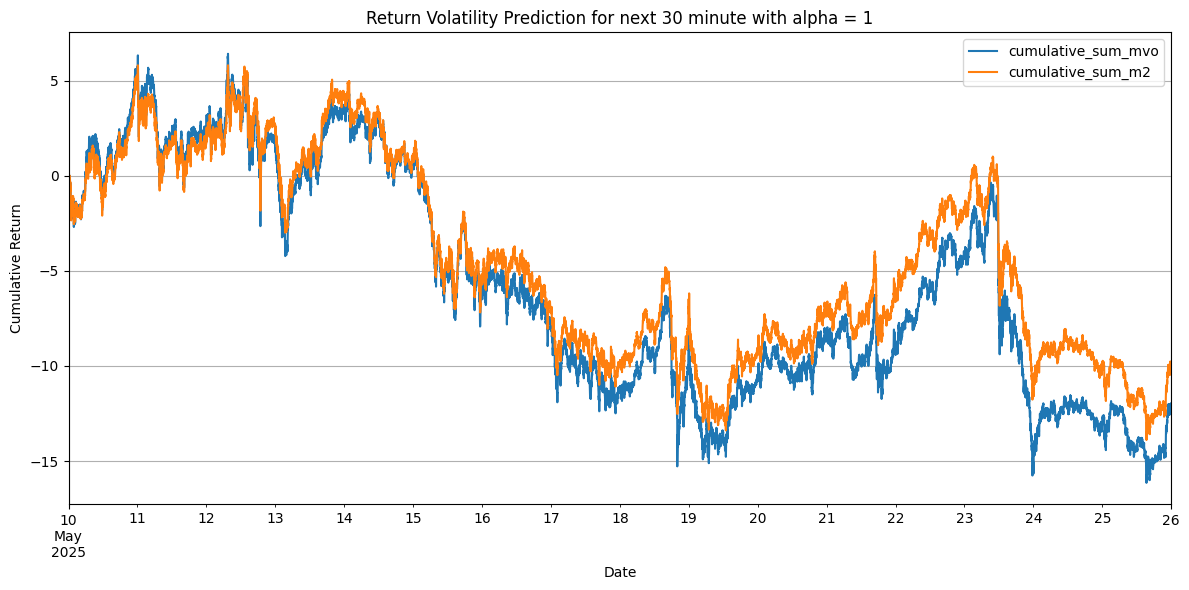

In [142]:
import matplotlib.pyplot as plt

# Let's assume your DataFrame is named df_portfolio
plt.figure(figsize=(12, 6))

# Select both columns and plot them together
df_portfolio[['cumulative_sum_mvo', 'cumulative_sum_m2']].plot(
    ax=plt.gca(), # This ensures it plots on the current figure's axes
    grid=True,
    title=f'Return Volatility Prediction for next 30 minute with alpha = {alpha}',
    xlabel='Date',
    ylabel='Cumulative Return'
)

# The legend is created automatically from the column names
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Portfolio/comparison_plot_epoch{}.png'.format(str(epoch)), dpi=300)
plt.show()